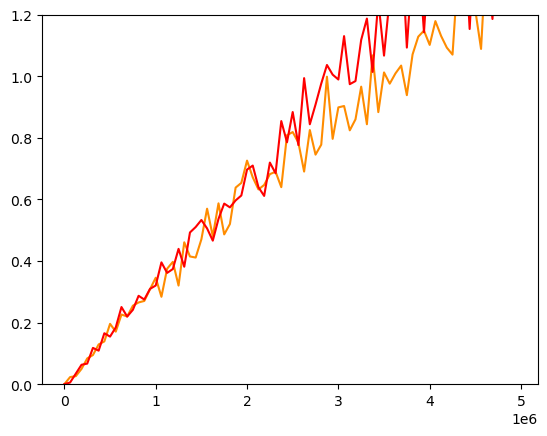

In [1]:
import time
import matplotlib.pyplot as plt


def append(n):
    a = []
    for i in range(n):
        a.append([1, 2, 3, 4])
    # print(a)


def extend(n):
    c = []
    for i in range(n):
        c.extend([[1, 2, 3, 4]])
    # print(c)


def draw_plot(f, num, color):
    def cnt(f, num):
        intervall = time.time()
        f(num)
        return time.time() - intervall

    x, y = [], []
    for i in range(10, num, num // 80):
        x.append(i)
        y.append(cnt(f, i))
    plt.plot(x, y, color=color)


num = 5000000
draw_plot(append, num, "darkorange")
draw_plot(extend, num, "red")
plt.ylim((0, 1.2))
plt.show()
# intervall1 = time.time()
# append(num)
# print('append', time.time() - intervall1)
# 
# intervall3 = time.time()
# extend(num)
# print('extend', time.time() - intervall3)
# 
# intervall4 = time.time()
# sum(num // 1000)
# print('sum', time.time() - intervall4)